In [1]:
#  Don't mind This
#  Its is there to supress annoying warnings
import pandas as pd
pd.options.mode.chained_assignment = None
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

documentation:

Data should be load frist as follow -
=>data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

Model class instance should be initialise as follow 
=>mod = Model(data)

To preprocess data have to this function 
=>mod.preprocess_data()

To split the data .We can use two Method
=>mod.stratified_sampling()
=>mod.spliting_data()

To deal with imbalance problem two method can be user .POINT TO NOTE-[Undersampling/Oversampling can be called before spliting data]
=>mod.undersampling()
=>mod.oversampling()

To fit the model 
=>mod.fit()

To Predict we have can method as follow .POINT TO NOTE-[ for testing purpose testing_dataframe is made after spliting data and label can be seen by calling mod.label where mod is Model class object. ]
mod.predict(mod.testing_dataframe)

For evalutating call this
mod.model_evaluating()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


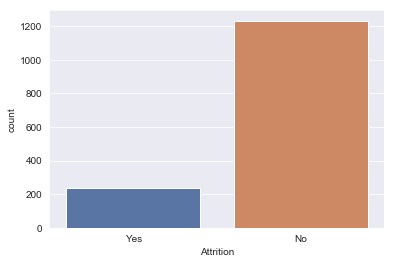

In [4]:
sns.set_style("darkgrid")
sns.countplot(x="Attrition" ,data=data,palette="deep")

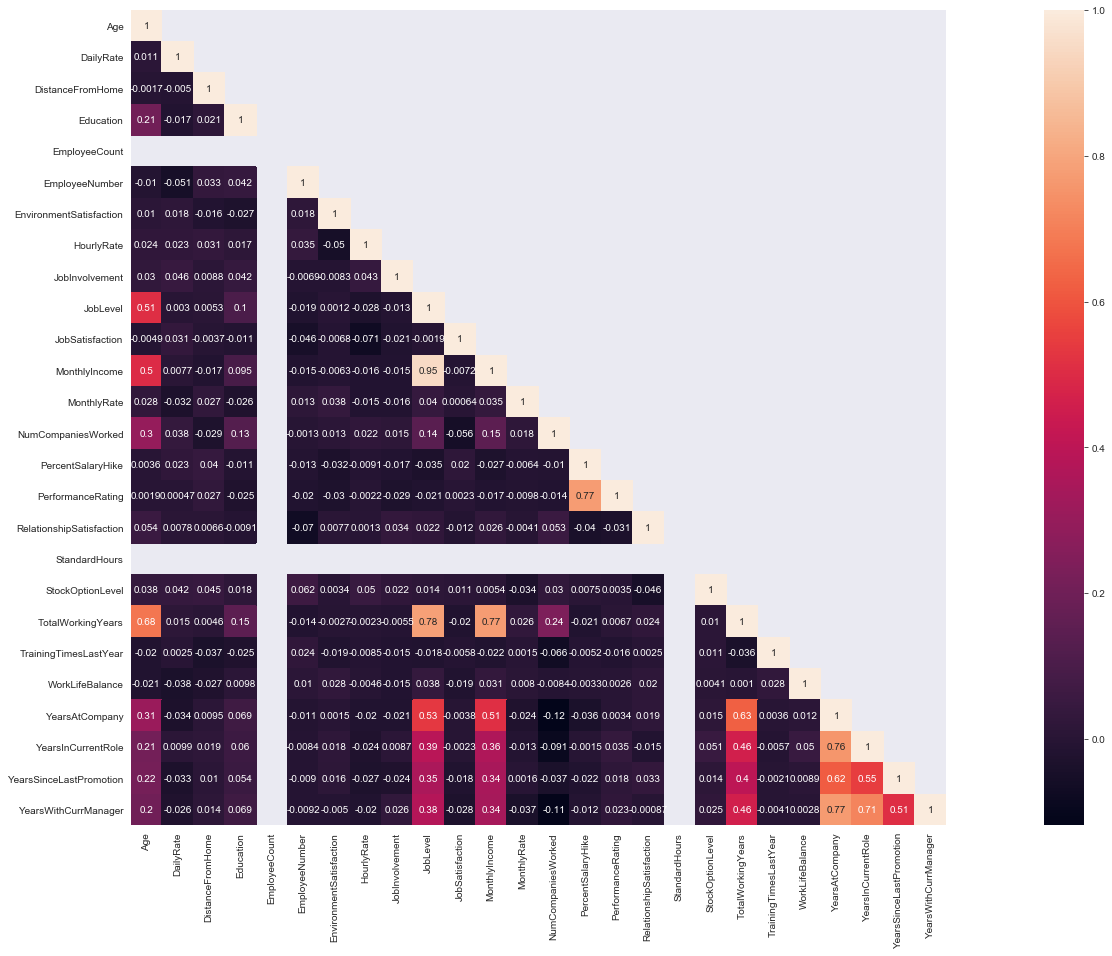

In [5]:
#corelation matrix.
cor_mat= data.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,15)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

SOME INFERENCES FROM THE ABOVE HEATMAP

Self relation ie of a feature to itself is equal to 1 as expected.

JobLevel is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

MonthlyIncome is very strongly related to joblevel as expected as senior employees will definately earn more.

PerformanceRating is highly related to PercentSalaryHike which is quite obvious.

Also note that TotalWorkingYears is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

YearsWithCurrManager is highly related to YearsAtCompany.

YearsAtCompany is related to YearsInCurrentRole.

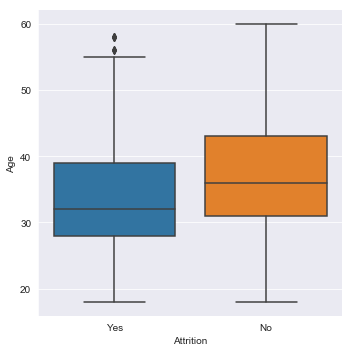

In [6]:
g=sns.catplot(data=data,y='Age',x='Attrition',height=5,aspect=1,kind='box')


This shows that people with higher age have lesser tendency to leave the organisation which makes sense as they may have settled in the organisation.

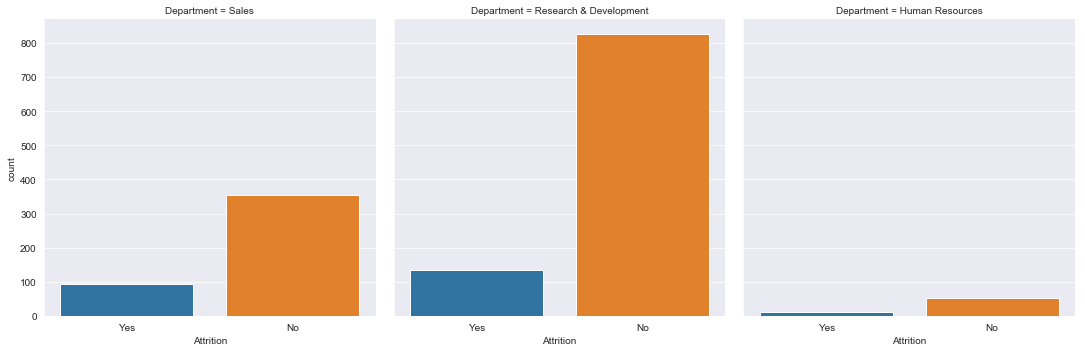

In [7]:
sns.catplot(data=data,kind='count',x='Attrition',col='Department')

In [8]:
 pd.crosstab(columns=[data.Attrition],index=[data.Department],margins=True,normalize='index')

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


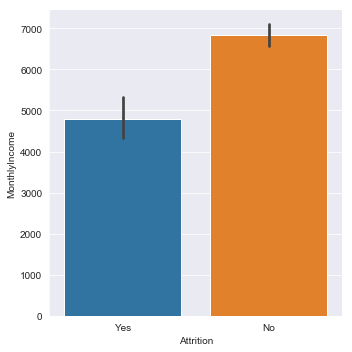

In [9]:
sns.catplot(data=data,kind='bar',x='Attrition',y='MonthlyIncome')

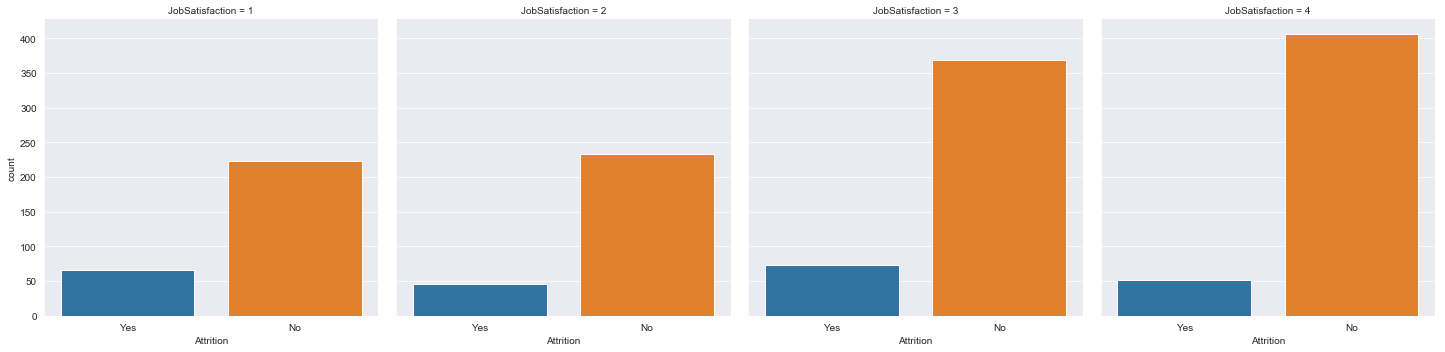

In [10]:
sns.catplot(data=data,kind='count',x='Attrition',col='JobSatisfaction')

In [11]:
pd.crosstab(columns=[data.Attrition],index=[data.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


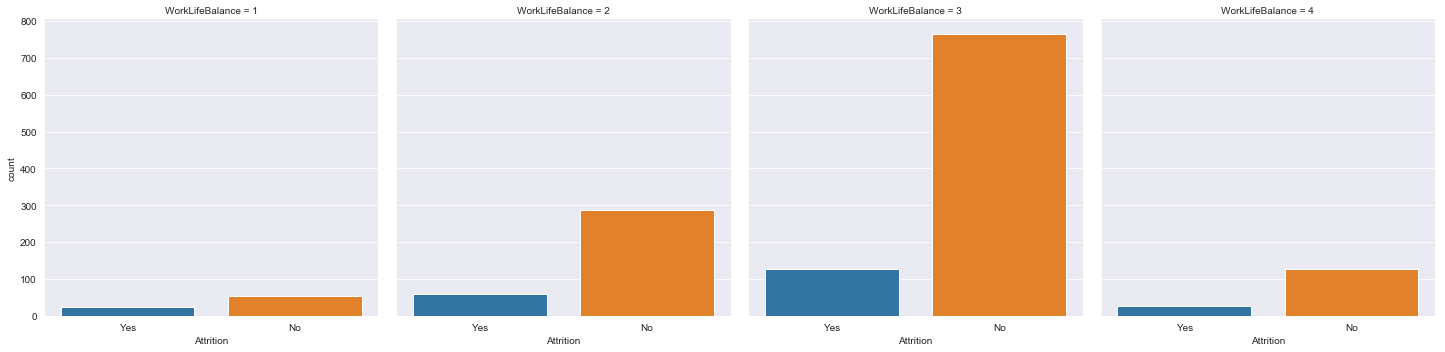

In [12]:
sns.catplot(data=data,kind='count',x='Attrition',col='WorkLifeBalance')

In [13]:
pd.crosstab(columns=[data.Attrition],index=[data.WorkLifeBalance],margins=True,normalize='index')

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


Again we notice a similar trend as people with better work life balance dont want to leave the organisation.

Oversampling the Minority

In an imbalanced dataset the main problem is that the data is highly skewed ie the number of observations of certain class is more than that of the other. Therefore what we do in this approach is to either increase the number of observations corressponding to the minority class (oversampling) or decrease the number of observations for the majority class (undersampling).

Note that in our case the number of observations is already pretty low and so oversampling will be more appropriate.

Below I have used an oversampling technique known as the SMOTE(Synthetic Minority Oversampling Technique) which randomly creates some 'Synthetic' instances of the minority class so that the net observations of both the class get balanced out.

Undersampling 

ClusterCentroids makes use of K-means to reduce the number of samples.
Therefore, each class will be synthesized with the centroids of the K-means method instead of the original samples
 

In [14]:
import numpy as np
import pandas as pd

from sklearn import linear_model 
from sklearn import neural_network 
from sklearn import ensemble 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import TomekLinks


class Model:

    def __init__(self,data,which_model=0):
        """
        which_model = 0  LogisticRegression
        which_model = 1  gradient_boosting
        which_model = 2  neutral_network
        which_model = 3  random_forest
        
        By Default which_model = 0  LogisticRegression
        
        """
        self.which_model=which_model
        self.data = data
        self.list_ = 0
        self.mod= 0
        
    def preprocess_data(self):
        self.list_ = self.creating_dict_of_str_column()

    def selecting_column_with_str_value(self):
        index_of_str_col = []
        for index, single_row_value in enumerate(list(self.data.iloc[0])):
            if isinstance(single_row_value, str):
                index_of_str_col.append(index)
        return index_of_str_col

    def converting_str_value_into_int(self, column_name):
        dict_test = {}
        for index, single_word in enumerate(self.data[column_name].unique()):
            dict_test[single_word] = index
        for single_keys in list(dict_test.keys()):
            self.data[column_name] = self.data[column_name].replace(single_keys, dict_test[single_keys])

        return dict_test

    def Eda_train(self):
        col_with_str_value = []
        for single_index in self.selecting_column_with_str_value():
            col_with_str_value.append(list(self.data.columns)[single_index])
        return col_with_str_value

    def creating_dict_of_str_column(self):
        list_ = {}
        for single_col_name in self.Eda_train():
            list_[single_col_name] = self.converting_str_value_into_int(single_col_name)
        return list_

    def creating_data(self):
        X = self.data.drop("Attrition", axis=1)
        Y = self.data["Attrition"]
        return X, Y

    def fit(self):
        if (self.which_model==0):
            X, Y = self.creating_data()
            self.mod = self.logistic_regression()
            self.mod.fit(X, Y)
            
        elif (self.which_model==1):
            X, Y = self.creating_data()
            self.mod = self.gradient_boosting()
            self.mod.fit(X, Y)
            
        elif (self.which_model==2):
            X, Y = self.creating_data()
            self.mod = self.neutral_network()
            self.mod.fit(X, Y)
            
        elif (self.which_model==3):
            X, Y = self.creating_data()
            self.mod = self.random_forest()
            self.mod.fit(X, Y)

                   

    def Eda_test(self, data_test):
        for single_key in list(self.list_.keys()):
            for single_df_test_col in list(data_test.columns):
                if single_key == single_df_test_col:
                    for single_inner_dict in list(self.list_[single_key].keys()):
                        if list(data_test[single_key])[0] == single_inner_dict:
                            data_test[single_key] = self.list_[single_key][single_inner_dict]
        return data_test

    def predict(self, df):
        df = self.Eda_test(df)
        self.result = self.mod.predict(df)
        final_result = []
        for single_result in self.result:
            for single_vale in list(self.list_["Attrition"].keys()):
                if self.list_["Attrition"][single_vale] == single_result:
                    final_result.append(single_vale)
        return final_result
    
    def oversampling(self):
        oversampler=SMOTE(random_state=42)
        X=self.data.drop(["Attrition"],axis=1)
        Y=self.data["Attrition"]
        x_train_smote,  y_train_smote = oversampler.fit_sample(X,Y)
        dummy=pd.DataFrame(columns=X.columns,data=x_train_smote)
        dummy["Attrition"]=y_train_smote
        self.data=dummy
    
    def undersampling(self,type=0):
        """
        type=0  RandomUnderSampler
        RandomUnderSampler is the most naive way of performing 
        such selection by randomly selecting a given number of samples by the targetted class.
        
        
        
        type=1  ClusterCentroids        
        ClusterCentroids under-samples by replacing the original samples by the centroids of the cluster found.
        
        
        type=2  NearMiss
        NearMiss algorithms implement some heuristic rules in order to select samples.
        NearMiss-1 selects samples from the majority class for which the average distance of the k nearest samples of 
        the minority class is the smallest.
        
        
        
        
        type=3  RepeatedEditedNearestNeighbours
        RepeatedEditedNearestNeighbours removes samples of the majority class for which their class differ from
        the one of their nearest-neighbors.
 
        
        
        type=4  InstanceHardnessThreshold
        InstanceHardnessThreshold uses the prediction of classifier to exclude samples.
        All samples which are classified with a low probability will be removed.
        
        type=5  Tomek links

        Tomek links are pairs of very close instances, but of opposite classes. 
        Removing the instances of the majority class of each pair increases the space between the two classes
        , facilitating the classification process
        
        
        
        """
        if(type==0):
            undersampler = RandomUnderSampler(random_state=0)
            X=self.data.drop(["Attrition"],axis=1)
            Y=self.data["Attrition"]
            x_train_smote,  y_train_smote = undersampler.fit_sample(X,Y)
            dummy=pd.DataFrame(columns=X.columns,data=x_train_smote)
            dummy["Attrition"]=y_train_smote
            self.data=dummy
        
        elif(type==1):
            undersampler= ClusterCentroids(random_state=0)
            X=self.data.drop(["Attrition"],axis=1)
            Y=self.data["Attrition"]
            x_train_smote,  y_train_smote = undersampler.fit_sample(X,Y)
            dummy=pd.DataFrame(columns=X.columns,data=x_train_smote)
            dummy["Attrition"]=y_train_smote
            self.data=dummy
        elif(type==2):
            undersampler = NearMiss()
            X=self.data.drop(["Attrition"],axis=1)
            Y=self.data["Attrition"]
            x_train_smote,  y_train_smote = undersampler.fit_sample(X,Y)
            dummy=pd.DataFrame(columns=X.columns,data=x_train_smote)
            dummy["Attrition"]=y_train_smote
            self.data=dummy
            
        elif(type==3):
            undersampler = RepeatedEditedNearestNeighbours()
            X=self.data.drop(["Attrition"],axis=1)
            Y=self.data["Attrition"]
            x_train_smote,  y_train_smote = undersampler.fit_sample(X,Y)
            dummy=pd.DataFrame(columns=X.columns,data=x_train_smote)
            dummy["Attrition"]=y_train_smote
            self.data=dummy
            
        elif(type==4):
            undersampler=InstanceHardnessThreshold(random_state=42)
            X=self.data.drop(["Attrition"],axis=1)
            Y=self.data["Attrition"]
            x_train_smote,  y_train_smote = undersampler.fit_sample(X,Y)
            dummy=pd.DataFrame(columns=X.columns,data=x_train_smote)
            dummy["Attrition"]=y_train_smote
            self.data=dummy
            
        elif (type==5):
            undersampler =TomekLinks()
            X=self.data.drop(["Attrition"],axis=1)
            Y=self.data["Attrition"]
            x_train_smote,  y_train_smote = undersampler.fit_sample(X,Y)
            dummy=pd.DataFrame(columns=X.columns,data=x_train_smote)
            dummy["Attrition"]=y_train_smote
            self.data=dummy

        else:
            return Exception(SyntaxError)
    
    def spliting_data(self,test_size=0.33, random_state=42):
        """
        test_size 0 to 1
        default test_size =0.33
        
        random_state=43
        
        """
        X=self.data.drop(["Attrition"],axis=1)
        Y=self.data["Attrition"]
        X_train, self.testing_dataframe, y_train, self.label = train_test_split(X, Y, test_size=test_size, random_state=42)
        X_train["Attrition"]=y_train
        self.data=X_train
    
    def stratified_sampling(self,test_size=0.33, random_state=42):
        """
        test_size 0 to 1
        default test_size =0.33
        
        random_state=43
        
        """
        X=self.data.drop(["Attrition"],axis=1)
        y=self.data["Attrition"]
        sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=0)
        train_array,test_array =next(sss.split(X, y))
        stratifed_train=pd.DataFrame()
        for i ,value in enumerate(train_array):
            if i==0:
                stratifed_train = X.loc[X.index==value]
            else:
                stratifed_train=pd.concat([stratifed_train,X.loc[X.index==value]])


        testing_dataframe=pd.DataFrame()
        for i ,value in enumerate(test_array):
            if i==0:
                testing_dataframe = X.loc[X.index==value]
            else:
                testing_dataframe=pd.concat([testing_dataframe,X.loc[X.index==value]])

        stratifed_train_label=[]      
        for value in train_array:
            stratifed_train_label.append(y[value])

        label=[]      
        for value in test_array:
            label.append(y[value])

        stratifed_train["Attrition"]= stratifed_train_label
        
        self.data=stratifed_train
        self.testing_dataframe=testing_dataframe
        self.label= label
    
    def logistic_regression(self):
        return linear_model.LogisticRegression()    
    
    def gradient_boosting(self):
        return ensemble.GradientBoostingClassifier(n_estimators= 1500,learning_rate= 0.25,max_depth= 4,min_samples_leaf= 2,subsample= 1,max_features= 'sqrt',verbose= 0)
        
    def neutral_network(self):
        return neural_network.MLPClassifier(activation='relu', solver='adam', hidden_layer_sizes=(256,64), max_iter=300)
    
    def random_forest(self):
        return ensemble.RandomForestClassifier(n_jobs= -1,n_estimators= 1000,max_depth= 4,min_samples_leaf= 2,max_features='sqrt',random_state= 22,verbose= 0)
    
    def model_evaluating(self):        
        return print("Confusion Matrix =\n",confusion_matrix(self.label,self.result,[self.list_["Attrition"]["No"],self.list_["Attrition"]["Yes"]]) ,"\n\n Accuracy =", accuracy_score(self.label,self.result)) ,print("\n",classification_report(self.label,self.result,[self.list_["Attrition"]["No"],self.list_["Attrition"]["Yes"]],["No" ,"Yes"]))
    
        

In [15]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
log_mod = Model(data)
log_mod.preprocess_data()

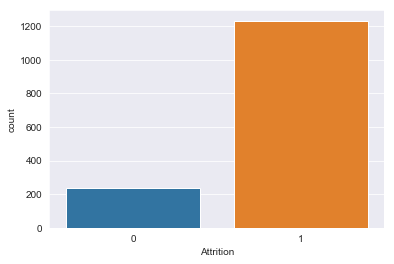

In [16]:
sns.countplot(x="Attrition" ,data=log_mod.data)

In [17]:
from sklearn.decomposition import PCA
pca =PCA(2)
pca.fit(log_mod.data)
Pca_X=data.loc[data["Attrition"]==0].drop(["Attrition"],axis=1)
Pca_Y=data.loc[data["Attrition"]==1].drop(["Attrition"],axis=1)
X=pca.fit_transform(Pca_X)
Y=pca.fit_transform(Pca_Y)


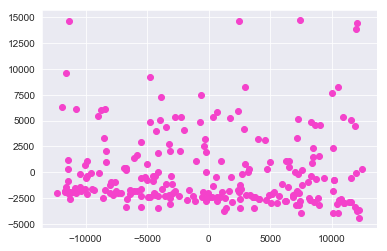

In [18]:
plt.scatter(x=X[:,0],y=X[:,1],c="#f442cb")


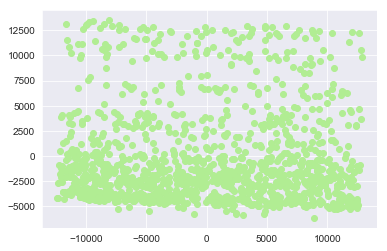

In [19]:
plt.scatter(x=Y[:,0],y=Y[:,1],c="#b1ed93")


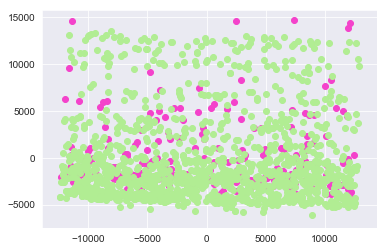

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x=X[:,0],y=X[:,1],c="#f442cb")
ax1.scatter(x=Y[:,0],y=Y[:,1],c="#b1ed93")


                                           With class imbalance problem 

In [21]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data)
mod.preprocess_data()
mod.stratified_sampling()
mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[403   5]
 [ 66  12]] 

 Accuracy = 0.8539094650205762

               precision    recall  f1-score   support

          No       0.86      0.99      0.92       408
         Yes       0.71      0.15      0.25        78

   micro avg       0.85      0.85      0.85       486
   macro avg       0.78      0.57      0.59       486
weighted avg       0.83      0.85      0.81       486



(None, None)

OVER  SAMPLING



                                          Logistic Regression





In [22]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data)
mod.preprocess_data()
mod.stratified_sampling()
mod.oversampling()

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[360  48]
 [ 34  44]] 

 Accuracy = 0.831275720164609

               precision    recall  f1-score   support

          No       0.91      0.88      0.90       408
         Yes       0.48      0.56      0.52        78

   micro avg       0.83      0.83      0.83       486
   macro avg       0.70      0.72      0.71       486
weighted avg       0.84      0.83      0.84       486



(None, None)

                                        Logistic Regression
With UNDER SAMPLING

In [23]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=0)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[295 113]
 [ 20  58]] 

 Accuracy = 0.7263374485596708

               precision    recall  f1-score   support

          No       0.94      0.72      0.82       408
         Yes       0.34      0.74      0.47        78

   micro avg       0.73      0.73      0.73       486
   macro avg       0.64      0.73      0.64       486
weighted avg       0.84      0.73      0.76       486



(None, None)

In [24]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=1)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[279 129]
 [ 20  58]] 

 Accuracy = 0.6934156378600823

               precision    recall  f1-score   support

          No       0.93      0.68      0.79       408
         Yes       0.31      0.74      0.44        78

   micro avg       0.69      0.69      0.69       486
   macro avg       0.62      0.71      0.61       486
weighted avg       0.83      0.69      0.73       486



(None, None)

In [25]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=2)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[174 234]
 [ 18  60]] 

 Accuracy = 0.48148148148148145

               precision    recall  f1-score   support

          No       0.91      0.43      0.58       408
         Yes       0.20      0.77      0.32        78

   micro avg       0.48      0.48      0.48       486
   macro avg       0.56      0.60      0.45       486
weighted avg       0.79      0.48      0.54       486



(None, None)

In [26]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=3)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[329  79]
 [ 25  53]] 

 Accuracy = 0.7860082304526749

               precision    recall  f1-score   support

          No       0.93      0.81      0.86       408
         Yes       0.40      0.68      0.50        78

   micro avg       0.79      0.79      0.79       486
   macro avg       0.67      0.74      0.68       486
weighted avg       0.84      0.79      0.81       486



(None, None)

In [27]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data)
mod.preprocess_data()

mod.undersampling(type=4)
mod.stratified_sampling()
mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()


Confusion Matrix =
 [[76 14]
 [12 66]] 

 Accuracy = 0.8452380952380952

               precision    recall  f1-score   support

          No       0.86      0.84      0.85        90
         Yes       0.82      0.85      0.84        78

   micro avg       0.85      0.85      0.85       168
   macro avg       0.84      0.85      0.84       168
weighted avg       0.85      0.85      0.85       168



(None, None)

In [28]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=5)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[400   8]
 [ 51  27]] 

 Accuracy = 0.8786008230452675

               precision    recall  f1-score   support

          No       0.89      0.98      0.93       408
         Yes       0.77      0.35      0.48        78

   micro avg       0.88      0.88      0.88       486
   macro avg       0.83      0.66      0.70       486
weighted avg       0.87      0.88      0.86       486



(None, None)

                                                Gradient Boosting


OVER SAMPLING

In [29]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 1)
mod.preprocess_data()
mod.stratified_sampling()
mod.oversampling()

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[394  14]
 [ 44  34]] 

 Accuracy = 0.8806584362139918

               precision    recall  f1-score   support

          No       0.90      0.97      0.93       408
         Yes       0.71      0.44      0.54        78

   micro avg       0.88      0.88      0.88       486
   macro avg       0.80      0.70      0.74       486
weighted avg       0.87      0.88      0.87       486



(None, None)

In [30]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 1)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=0)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[296 112]
 [ 22  56]] 

 Accuracy = 0.7242798353909465

               precision    recall  f1-score   support

          No       0.93      0.73      0.82       408
         Yes       0.33      0.72      0.46        78

   micro avg       0.72      0.72      0.72       486
   macro avg       0.63      0.72      0.64       486
weighted avg       0.83      0.72      0.76       486



(None, None)

In [31]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 1)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=1)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[ 25 383]
 [  0  78]] 

 Accuracy = 0.21193415637860083

               precision    recall  f1-score   support

          No       1.00      0.06      0.12       408
         Yes       0.17      1.00      0.29        78

   micro avg       0.21      0.21      0.21       486
   macro avg       0.58      0.53      0.20       486
weighted avg       0.87      0.21      0.14       486



(None, None)

In [32]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 1)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=2)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[160 248]
 [ 19  59]] 

 Accuracy = 0.4506172839506173

               precision    recall  f1-score   support

          No       0.89      0.39      0.55       408
         Yes       0.19      0.76      0.31        78

   micro avg       0.45      0.45      0.45       486
   macro avg       0.54      0.57      0.43       486
weighted avg       0.78      0.45      0.51       486



(None, None)

In [33]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 1)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=3)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[315  93]
 [ 28  50]] 

 Accuracy = 0.7510288065843621

               precision    recall  f1-score   support

          No       0.92      0.77      0.84       408
         Yes       0.35      0.64      0.45        78

   micro avg       0.75      0.75      0.75       486
   macro avg       0.63      0.71      0.65       486
weighted avg       0.83      0.75      0.78       486



(None, None)

In [34]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 1)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=4)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[220 188]
 [ 12  66]] 

 Accuracy = 0.588477366255144

               precision    recall  f1-score   support

          No       0.95      0.54      0.69       408
         Yes       0.26      0.85      0.40        78

   micro avg       0.59      0.59      0.59       486
   macro avg       0.60      0.69      0.54       486
weighted avg       0.84      0.59      0.64       486



(None, None)

In [35]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 1)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=5)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[394  14]
 [ 52  26]] 

 Accuracy = 0.8641975308641975

               precision    recall  f1-score   support

          No       0.88      0.97      0.92       408
         Yes       0.65      0.33      0.44        78

   micro avg       0.86      0.86      0.86       486
   macro avg       0.77      0.65      0.68       486
weighted avg       0.85      0.86      0.85       486



(None, None)

                                                     Neural Network

OVER SAMPLING

In [36]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 2)
mod.preprocess_data()
mod.stratified_sampling()
mod.oversampling()

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[183 225]
 [ 19  59]] 

 Accuracy = 0.49794238683127573

               precision    recall  f1-score   support

          No       0.91      0.45      0.60       408
         Yes       0.21      0.76      0.33        78

   micro avg       0.50      0.50      0.50       486
   macro avg       0.56      0.60      0.46       486
weighted avg       0.79      0.50      0.56       486



(None, None)

                                                neural network
With UNDERSAMPLING

In [37]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 2)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=0)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[ 29 379]
 [  3  75]] 

 Accuracy = 0.2139917695473251

               precision    recall  f1-score   support

          No       0.91      0.07      0.13       408
         Yes       0.17      0.96      0.28        78

   micro avg       0.21      0.21      0.21       486
   macro avg       0.54      0.52      0.21       486
weighted avg       0.79      0.21      0.16       486



(None, None)

In [38]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 2)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=1)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[117 291]
 [ 14  64]] 

 Accuracy = 0.3724279835390947

               precision    recall  f1-score   support

          No       0.89      0.29      0.43       408
         Yes       0.18      0.82      0.30        78

   micro avg       0.37      0.37      0.37       486
   macro avg       0.54      0.55      0.36       486
weighted avg       0.78      0.37      0.41       486



(None, None)

In [39]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 2)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=2)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[259 149]
 [ 64  14]] 

 Accuracy = 0.5617283950617284

               precision    recall  f1-score   support

          No       0.80      0.63      0.71       408
         Yes       0.09      0.18      0.12        78

   micro avg       0.56      0.56      0.56       486
   macro avg       0.44      0.41      0.41       486
weighted avg       0.69      0.56      0.61       486



(None, None)

In [40]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 2)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=3)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[330  78]
 [ 57  21]] 

 Accuracy = 0.7222222222222222

               precision    recall  f1-score   support

          No       0.85      0.81      0.83       408
         Yes       0.21      0.27      0.24        78

   micro avg       0.72      0.72      0.72       486
   macro avg       0.53      0.54      0.53       486
weighted avg       0.75      0.72      0.74       486



(None, None)

In [41]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 2)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=4)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[322  86]
 [ 51  27]] 

 Accuracy = 0.7181069958847737

               precision    recall  f1-score   support

          No       0.86      0.79      0.82       408
         Yes       0.24      0.35      0.28        78

   micro avg       0.72      0.72      0.72       486
   macro avg       0.55      0.57      0.55       486
weighted avg       0.76      0.72      0.74       486



(None, None)

In [42]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 2)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=5)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[405   3]
 [ 73   5]] 

 Accuracy = 0.8436213991769548

               precision    recall  f1-score   support

          No       0.85      0.99      0.91       408
         Yes       0.62      0.06      0.12        78

   micro avg       0.84      0.84      0.84       486
   macro avg       0.74      0.53      0.52       486
weighted avg       0.81      0.84      0.79       486



(None, None)

                                                   Random Forest

OVER SAMPLING                          

In [43]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 3)
mod.preprocess_data()
mod.stratified_sampling()
mod.oversampling()

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[374  34]
 [ 43  35]] 

 Accuracy = 0.8415637860082305

               precision    recall  f1-score   support

          No       0.90      0.92      0.91       408
         Yes       0.51      0.45      0.48        78

   micro avg       0.84      0.84      0.84       486
   macro avg       0.70      0.68      0.69       486
weighted avg       0.83      0.84      0.84       486



(None, None)

                                                Random Forest
With UNDERSAMPLING


In [44]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 3)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=0)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[323  85]
 [ 23  55]] 

 Accuracy = 0.7777777777777778

               precision    recall  f1-score   support

          No       0.93      0.79      0.86       408
         Yes       0.39      0.71      0.50        78

   micro avg       0.78      0.78      0.78       486
   macro avg       0.66      0.75      0.68       486
weighted avg       0.85      0.78      0.80       486



(None, None)

In [45]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 3)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=1)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[ 55 353]
 [  2  76]] 

 Accuracy = 0.26954732510288065

               precision    recall  f1-score   support

          No       0.96      0.13      0.24       408
         Yes       0.18      0.97      0.30        78

   micro avg       0.27      0.27      0.27       486
   macro avg       0.57      0.55      0.27       486
weighted avg       0.84      0.27      0.25       486



(None, None)

In [46]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 3)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=2)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[169 239]
 [ 25  53]] 

 Accuracy = 0.4567901234567901

               precision    recall  f1-score   support

          No       0.87      0.41      0.56       408
         Yes       0.18      0.68      0.29        78

   micro avg       0.46      0.46      0.46       486
   macro avg       0.53      0.55      0.42       486
weighted avg       0.76      0.46      0.52       486



(None, None)

In [47]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 3)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=3)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[331  77]
 [ 41  37]] 

 Accuracy = 0.757201646090535

               precision    recall  f1-score   support

          No       0.89      0.81      0.85       408
         Yes       0.32      0.47      0.39        78

   micro avg       0.76      0.76      0.76       486
   macro avg       0.61      0.64      0.62       486
weighted avg       0.80      0.76      0.77       486



(None, None)

In [48]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 3)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=4)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[246 162]
 [ 14  64]] 

 Accuracy = 0.6378600823045267

               precision    recall  f1-score   support

          No       0.95      0.60      0.74       408
         Yes       0.28      0.82      0.42        78

   micro avg       0.64      0.64      0.64       486
   macro avg       0.61      0.71      0.58       486
weighted avg       0.84      0.64      0.69       486



(None, None)

In [49]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
mod = Model(data,which_model = 3)
mod.preprocess_data()
mod.stratified_sampling()
mod.undersampling(type=5)

mod.fit()
mod.predict(mod.testing_dataframe)
mod.model_evaluating()

Confusion Matrix =
 [[406   2]
 [ 70   8]] 

 Accuracy = 0.8518518518518519

               precision    recall  f1-score   support

          No       0.85      1.00      0.92       408
         Yes       0.80      0.10      0.18        78

   micro avg       0.85      0.85      0.85       486
   macro avg       0.83      0.55      0.55       486
weighted avg       0.84      0.85      0.80       486



(None, None)